# Título

## Instalamos las librerías

In [68]:
import tensorflow as tf
import os
from sklearn import metrics

In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Cargamos los datos

In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('../data/train/')

Found 569 files belonging to 3 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

In [39]:
batch[1]

array([2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 2, 0, 2, 2, 1])

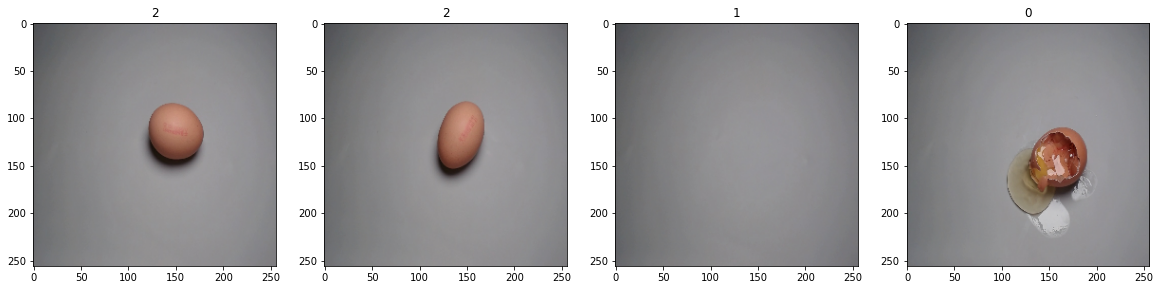

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Escalamos los datos

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
scaled_iterator = data.as_numpy_iterator()

In [43]:
batch = scaled_iterator.next()

In [44]:
batch[0].max()

1.0

In [45]:
type(scaled_iterator)

tensorflow.python.data.ops.dataset_ops._NumpyIterator

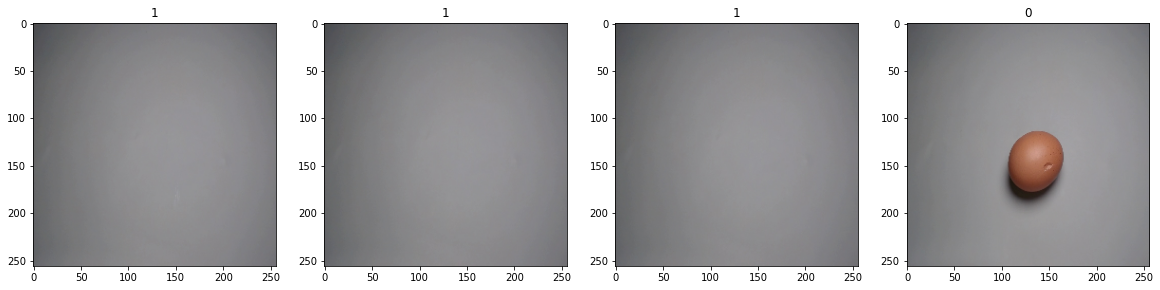

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Seleccionamos la cantidad de datos para train y test

In [47]:
batch[1]

array([1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 2])

In [48]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [49]:
train_size

12

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
print(len(train))
print(len(val))
print(len(test))

12
4
2


## Creamos el modelo de red convolucional

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [53]:
import keras

In [54]:
capas = [
    keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (256,256,3)),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    keras.layers.Conv2D(128, (3,3), activation = "relu", input_shape = (32,32,3)),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(3, activation = "softmax")
]


In [55]:
modelo = keras.Sequential(capas)
modelo.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics = ["accuracy"])

## Entrenamos el modelo

In [56]:
logdir='logs'

In [57]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
hist = modelo.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 42s 3s/step - loss: 6.8828 - accuracy: 0.3490 - val_loss: 1.0554 - val_accuracy: 0.3516
Epoch 2/20
12/12 [==============================] - 39s 3s/step - loss: 0.7298 - accuracy: 0.7500 - val_loss: 0.3000 - val_accuracy: 0.9219
Epoch 3/20
12/12 [==============================] - 23s 2s/step - loss: 0.3288 - accuracy: 0.8698 - val_loss: 0.2819 - val_accuracy: 0.8906
Epoch 4/20
12/12 [==============================] - 20s 2s/step - loss: 0.3074 - accuracy: 0.8698 - val_loss: 0.2719 - val_accuracy: 0.8750
Epoch 5/20
12/12 [==============================] - 21s 2s/step - loss: 0.2402 - accuracy: 0.8906 - val_loss: 0.2727 - val_accuracy: 0.8906
Epoch 6/20
12/12 [==============================] - 22s 2s/step - loss: 0.2904 - accuracy: 0.8672 - val_loss: 0.2577 - val_accuracy: 0.9062
Epoch 7/20
12/12 [==============================] - 22s 2s/step - loss: 0.2406 - accuracy: 0.9141 - val_loss: 0.2162 - val_accuracy: 0.8906
Epoch 8/20
12/12 [==

In [59]:
hist.history

{'loss': [6.882829666137695,
  0.7297594547271729,
  0.3288198411464691,
  0.3073940575122833,
  0.24018771946430206,
  0.2904371917247772,
  0.2406265288591385,
  0.23254871368408203,
  0.26525259017944336,
  0.23675644397735596,
  0.1773795336484909,
  0.1991076022386551,
  0.20567576587200165,
  0.16738136112689972,
  0.1306067258119583,
  0.13411866128444672,
  0.1320497840642929,
  0.1409679800271988,
  0.10224425792694092,
  0.07724469155073166],
 'accuracy': [0.3489583432674408,
  0.75,
  0.8697916865348816,
  0.8697916865348816,
  0.890625,
  0.8671875,
  0.9140625,
  0.9036458134651184,
  0.890625,
  0.90625,
  0.9348958134651184,
  0.9192708134651184,
  0.9036458134651184,
  0.9296875,
  0.9505208134651184,
  0.9505208134651184,
  0.9557291865348816,
  0.9453125,
  0.9635416865348816,
  0.9869791865348816],
 'val_loss': [1.0554476976394653,
  0.29997125267982483,
  0.28186115622520447,
  0.271920382976532,
  0.2726627290248871,
  0.25770241022109985,
  0.21617498993873596,
  

## Graficamos la actuación del modelo

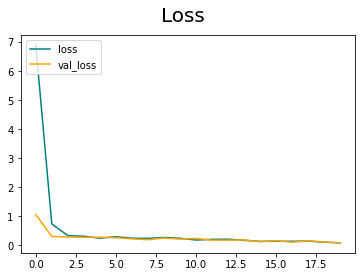

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

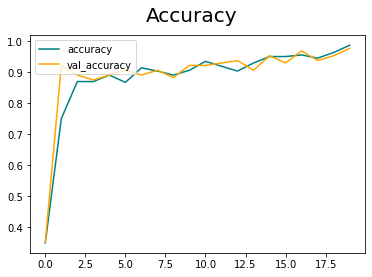

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluación

In [76]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = modelo.predict(x)
    print(metrics.accuracy_score(np.argmax(modelo.predict(x), axis = 1), y))

1/1 [==============================] - 0s 387ms/step
1.0
1/1 [==============================] - 0s 335ms/step
0.96


## Guardamos el modelo

In [30]:
from tensorflow.keras.models import load_model

In [31]:
modelo.save(os.path.join('../model','imageclassifier.h5'))